# Lab 2: Normalization
For this lab, we are going to practice normalization on the California Housing Price dataset, which we will load using scikit learn. 

## 1.Create Dataset

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing # pull out california housing dataset

# create object to download dataset
cali_data = fetch_california_housing()

# view dataset info
print(cali_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

We can prepare this dataset by joining its data and target attributes into a a dataframe, using the feature_names attribute as column names: 

In [2]:
# combine features and column names
cali_df = pd.DataFrame(cali_data.data, 
                      columns=cali_data.feature_names)

cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## 2. Apply Standardization to the Dataframe 
Apply standardization to the dataframe using sklearn's standardized scaler. 

In [3]:
# we already have flots, so we can proceed with standardization
from sklearn import preprocessing

# create scaler
standard_scaler = preprocessing.StandardScaler()

# fit the model and transform 
cali_standardized = pd.DataFrame(standard_scaler.fit_transform(cali_df),
                                 columns=cali_df.columns)
cali_standardized.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


## 3. Apply min-max scaling to the Dataframe
Apply sklearn's min-max scaler to cali_df

In [4]:
# your code goes here, save results as new dataframe called cali_minmax
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
cali_minmax = pd.DataFrame(min_max_scaler.fit_transform(cali_df),
                         columns=cali_df.columns)
cali_minmax.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163


## 4. Plot the results
Calculate summary stats and create bar plots to examine the effects of normalization on the results of both standardization and min-max scaling on the MedInc (median income) column. 

Since this is a large dataframe, it would take too long to plot. So let's use the pandas sample() function to plot a random sample of each dataset. The following syntax would sample 10% of our dataframe without replacement: 
`df.sample(frac=.10, replace=False)`

Here's an example plotting the original dataframe: 

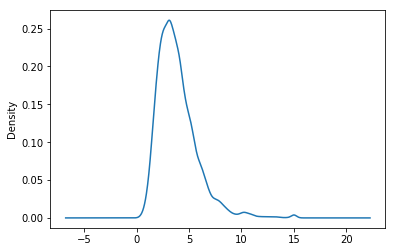

In [5]:
%matplotlib inline
cali_df.MedInc.plot(kind='density')

In [6]:
cali_df.MedInc.describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64

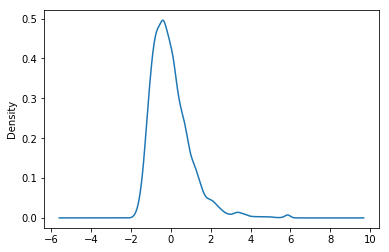

In [10]:
cali_standardized.MedInc.plot(kind='density')

In [11]:
cali_standardized.MedInc.describe()

count    2.064000e+04
mean     3.734255e-16
std      1.000024e+00
min     -1.774299e+00
25%     -6.881186e-01
50%     -1.767951e-01
75%      4.593063e-01
max      5.858286e+00
Name: MedInc, dtype: float64

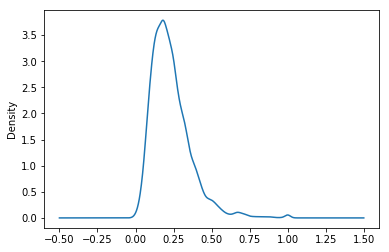

In [12]:
cali_minmax.MedInc.plot(kind='density')

In [14]:
cali_minmax.MedInc.describe()

count    20640.000000
mean         0.232464
std          0.131020
min          0.000000
25%          0.142308
50%          0.209301
75%          0.292641
max          1.000000
Name: MedInc, dtype: float64

## 5. Interpret the results
Which method do you think works best for this dataset? Why? Are there any columns that should not be standardized? 